Name: Saad Shahid

Andrew ID: sshahid

Collaborators (if none, say "none"; do *not* leave this blank): Code from demo, recitation as well as help from online resources. Discussed values with peers.

Reminder: you should not be sharing code.

### Instructions
1. Fill in your name, Andrew ID, and collaborators above.
2. Fill in the code/text blocks to answer each question.
3. Do *not* change any of the existing code provided.
4. Run the entire notebook *before* submitting it on Canvas to make sure that the code actually runs without errors. (**Important**: Any code cells that you have entered code for but did not actually execute will be disregarded, so please be sure to actually run your code first and make sure it runs without errors! We may re-run a subset of your code for grading purposes.)
5. Be careful about where you save data for use with this Jupyter notebook (more details on this later).

### [Problem 1] The Distribution of Words in a Human Language: Zipf's Law [45 pts]

In this problem, you will be looking at a phenomenon of "natural languages" (i.e., human languages, such as English). As it turns out, when we look at the distribution of words in a different human languages, the distribution roughly follows what's called *Zipf's law* ([Wikipedia](https://en.wikipedia.org/wiki/Zipf%27s_law)).

*Zipf's law* states that given a large sample of words used, any word's frequency is inversely proportional to its rank in the frequency table (the word with rank 1 is the most frequently occurring word, the word with rank 2 is the second most frequently occurring word, etc). In this problem, you are going to test Zipf's law on a real dataset and explore some of its properties.

This problem assumes you have already installed the `spaCy` package ([https://spacy.io](https://spacy.io)). Instructions for installing this are part of the tutorial file "`Anaconda, Jupyter, and spaCy setup tutorial.pdf`". You can find how to access lemmatized tokens using `spaCy` by looking at the `spaCy` demo Jupyter notebook from lecture.

Note: For this problem, you don't actually need `spaCy`'s named entity recognition, grammatical parsing, or part-of-speech tagging. Turning these elements off when you instantiate the nlp object can substantially speed up your code.  To make sure these are off when instantiating the nlp object, call: 

`
nlp = spacy.load('en', disable=['ner', 'parser', 'tagger'])
`


(a) [5 pts] Read the data files.

The dataset is a collection of the 100 most popular books downloaded from Gutenburg Project ([https://www.gutenberg.org/browse/scores/top](https://www.gutenberg.org/browse/scores/top)). Each file contains the text of a book. Now read all the texts from disk. This will be the corpus in this problem.

Note: Please DO NOT change the folder name or the path, and make sure you use a relative path (e.g. './HW1_Dataset/*filename*) when reading the files. When grading your homework, we will put your Jupyter notebook file and the dataset in the same folder, and run your code. **You will receive 0 points for this problem if your code fails to load the data.**

Hint: To list all files that match a certain pattern, you can use the `glob` package. Here's an example usage:

`
import glob
print(glob.glob('./HW1_Dataset/*.txt'))
`

Hint: When debugging your code, you may want to first make sure your code runs on a few of the books rather than all 100 (for example, you can start by only having 3 of the text files in `HW1_Dataset`). Once you're confident that your solution is correct on a few text files, then run on all of them! This is a standard approach to debugging code that is meant to handle large datasets.

In [0]:
import spacy
nlp = spacy.load('en')
import glob
nlp.max_length=700000000000
list_of_files = glob.glob('./HW1_Dataset/*.txt')
file_path='./HW1_Dataset/'

    
    
    



(b) [15 pts] Build the frequency table. Specifically, complete the following three tasks:

  1. Process the text by separating and lemmatizing the words.
  2. Then count the number of times each word appears in the corpus and build a frequency table. (In particular, use raw counts as the "frequency"--do not divide by the total number of words in the corpus.)
  3. Sort the table and print the top 50 most frequent words, along with their frequencies and ranks. Don't worry about ties (for example, if multiple things have the same frequency, it's fine if your solution breaks ties arbitrarily in the sorting).

Note: When counting the words, only include words (tokens) that consist of alphabetic letters (a-z and A-Z). You can do this with what's called a *regular expression*. For example, to check whether the words "will.i.am" or "Tesla" are alphabetic, you would do the following:

`
import re  # regular expression package
if re.match('[a-zA-Z]+$', 'will.i.am'):
    print('will.i.am consists only of alphabetic letters!')
if re.match('[a-zA-Z]+$', 'Tesla'):
    print('tesla consists only of alphabetic letters!')
`

In [0]:
from collections import Counter
from operator import itemgetter
import re
histogram = Counter()
file_count=0
for file in list_of_files:
    text=open(file, encoding="utf8").read()
    parsed_text=nlp(text)
    for token in parsed_text:
        lemma = token.lemma_.lower()
        if(re.match('[a-zA-Z]+$', lemma)):
            histogram[lemma] += 1
    file_count+=1
    if file_count > 10:
            break

#######Only reading 11 files for performance issues###########
sorted_lemma_count_pairs = sorted(histogram.items(),
                                  reverse=True,
                                  key=itemgetter(1))
c=1
l=list()
for lemma, count in sorted_lemma_count_pairs:
    if c <=50:
        print(lemma, ":", count, 'rank:', c)
    l.append(count)
    c+=1                              

the : 40497 rank: 1
be : 26737 rank: 2
and : 26432 rank: 3
of : 21136 rank: 4
to : 19131 rank: 5
a : 16261 rank: 6
in : 13444 rank: 7
have : 9304 rank: 8
that : 8660 rank: 9
not : 7186 rank: 10
with : 6134 rank: 11
as : 5741 rank: 12
for : 5472 rank: 13
do : 5092 rank: 14
say : 4633 rank: 15
but : 4357 rank: 16
on : 4234 rank: 17
at : 4172 rank: 18
by : 3658 rank: 19
all : 3425 rank: 20
so : 3378 rank: 21
this : 3000 rank: 22
would : 2767 rank: 23
go : 2750 rank: 24
there : 2676 rank: 25
or : 2573 rank: 26
from : 2494 rank: 27
no : 2473 rank: 28
which : 2338 rank: 29
one : 2318 rank: 30
if : 2299 rank: 31
out : 2291 rank: 32
when : 2251 rank: 33
up : 2226 rank: 34
will : 2112 rank: 35
de : 2038 rank: 36
see : 2004 rank: 37
come : 1947 rank: 38
an : 1914 rank: 39
what : 1907 rank: 40
know : 1838 rank: 41
get : 1818 rank: 42
then : 1816 rank: 43
good : 1791 rank: 44
make : 1763 rank: 45
who : 1716 rank: 46
could : 1625 rank: 47
time : 1563 rank: 48
take : 1540 rank: 49
work : 1512 rank: 

(c) [10 pts] Visualize the frequency table by plotting a **raw scatter plot** (put frequency as the y-axis and rank as the x-axis), and a **log-log plot** (use logarithmic scales on both the x- and y- axes). Note that this should be for all words and not only the top 50. As before, for the ranks, do not worry about ties, i.e., break ties arbitrarily.

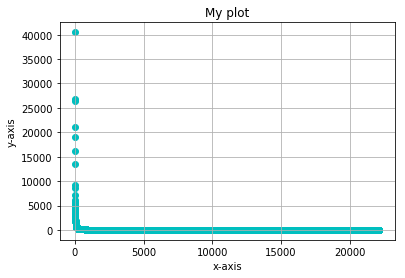

In [0]:
# Raw scatter plot
import numpy as np
import matplotlib.pyplot as plt
s=len(sorted_lemma_count_pairs)+1
x=np.arange(1,s)
y=np.array(l)

colors = (0,0,0)
area = np.pi*3
 
# Plot
plt.scatter(x,y, color = 'c')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('My plot')
plt.grid()
plt.show()

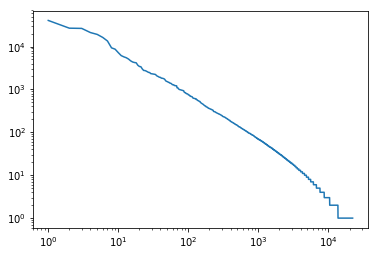

In [0]:
# Log-log plot
import numpy as np
import matplotlib.pyplot as plt
s=len(sorted_lemma_count_pairs)+1
x=np.arange(1,s)
y=np.array(l)

colors = (0,0,0)
area = np.pi*3
 
# Plot
plt.loglog(x,y)
plt.show()

(d) [15 pts] Explore the frequency table: Zipf's law states that term frequency is governed by a power low, i.e. the relationship between term frequency and rank can be approximated by $f(r) = cr^{-1}$, where $f(r)$ is the frequency of the term at rank $r$, $r$ is the rank of a term, and $c$ is a constant and is approximately 0.1*(corpus size) for English. 

Answer following questions:

- What do you observe in the log-log plot above? Is this consist with the power law?

Your text answer (for this question, your answer is *not* code):The log-log plot above seems to be consistent with the Zipf's law where the frequency of words is decreasing exponentially as the values of the rank increases. 

- Think of the corpus as a (large) unigram bag of words. Following the analogy from lecture, imagine drawing a single word from this big bag (note that we are assuming that we've lemmatized the words and also filtered out non-alphanumeric words). What is the probability of drawing one of the 4 most frequent words? What is the probability of drawing one of the 50 most frequent words? Answer these two questions using code rather than just entering in the final answers as numbers.

In [0]:
c=1
top4=0
total=0
top50=0
c1=0
c10=0
for lemma,count in sorted_lemma_count_pairs:
    if c <= 4:
        top4+=count
    if c <=50:
        top50+=count
    if count==1:
        c1+=1
    if count<10:
        c10+=1
    total+=count
    c+=1
print('Probability of drawing one of the 4 most frequent words: ', top4/total)        
print('Probability of drawing one of the 50 most frequent words: ', top50/total)
print(top4, top50)

Probability of drawing one of the 4 most frequent words:  0.17465905564041553
Probability of drawing one of the 50 most frequent words:  0.45709365091922616
114802 300444


- What proportion of the words occur only once? What proportion of the words occur fewer than 10 times?

In [0]:
print("Occur only once: ", c1/len(histogram))
print("Occur fewer than 10 times: ", c10/len(histogram))


Occur only once:  0.3836117381489842
Occur fewer than 10 times:  0.781489841986456


### [Problem 2] Entity Recognition and Pointwise Mutual Information (PMI) [50 pts]
By using the entity recognition system in `spaCy`, let's identify named entities from newspaper articles. You'll be using Reuters corpus which contains more than ten thousand newspaper articles. To run the code below, you need to download the Reuters dataset. To do so, in a terminal/command line (recall that you can open a terminal from Jupyter's webpage that shows all the files, which by default is [http://localhost:8888/tree](http://localhost:8888/tree)), start up Python and enter:

`
import nltk
nltk.download('reuters')
`

Then proceed to the problem subparts below.

Note that in this problem you will need named entity recognition but not grammatical parsing or the part-of-speech tagging. Hence, you will want to instantiate the nlp object by calling:

`
nlp = spacy.load('en', disable=['parser', 'tagger'])
`


(a) [15 pts] Draw a bar chart in which one of the axes shows entity labels and the other shows the frequency of the corresponding label. Use the variables `reuters_nlp` and `label_counter` provided in the code below.

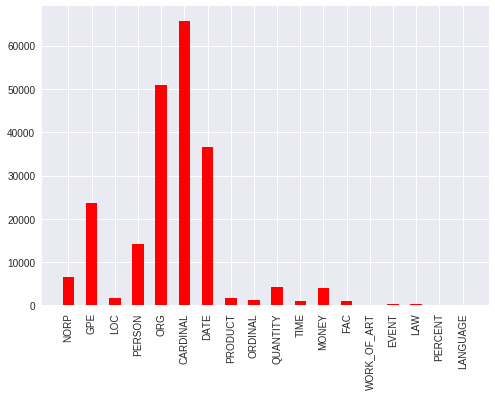

In [3]:
import matplotlib.pyplot as plt
from collections import Counter
from nltk.corpus import reuters
import re
import spacy
import numpy as np
nlp = spacy.load('en', disable=['parser', 'tagger'])
reuters_fileids = reuters.fileids()  # hint: when first debugging, consider looking at just the first few
reuters_nlp = [nlp(re.sub('\s+',' ', reuters.raw(i)).strip()) for i in reuters_fileids]
label_counter = Counter()

##For bar chart
for r in reuters_nlp:
  for entity in r.ents:
    label_counter[entity.label_]+=1
x=np.array(list(label_counter.keys()))
y=np.array(list(label_counter.values()))
plt.bar(x, y, width=0.5, color="red")
plt.xticks(rotation=90)
plt.show()    


(b) [15 pts] Now list the top 10 most frequently occured entities (entity text and the number of occurence) with labels `ORG` (organization) and `GPE` (countries, cities, states) respectively.

Hint: Here, when counting the frequency, we need to count how many articles have an entity with the desired property. For every article, we add 1 if the article has the entity and 0 otherwise.  List filtering (as in Recitation 1) will be helpful here.

In [6]:
import pandas as pd
r_dict_gpe={}
r_dict_org={}
ent_list_gpe=list()
ent_list_org=list()
for r in reuters_nlp:
  ents_gpe = [entity.lemma_.lower() for entity in r.ents if entity.label_=='GPE']
  ents_org= [entity.lemma_.lower() for entity in r.ents if entity.label_=='ORG']
  r_dict_gpe[r]=ents_gpe
  r_dict_org[r]=ents_org
  ent_list_gpe.extend(ents_gpe)
  ent_list_org.extend(ents_org)

##Calculate most frequent GPE entities
ent_count_gpe=Counter()
ent_list_set_gpe=list(set(ent_list_gpe))
for en in ent_list_set_gpe:
  for key, value in r_dict_gpe.items():
    if en in value:
      ent_count_gpe[en]+=1
GPE_Table = pd.DataFrame(ent_count_gpe.most_common(10), columns=['GPE', 'Count'])  
print('************Most Frequent GPE entities************')
print(GPE_Table)
#Calculate most frequent ORG entities
ent_count_org=Counter()
ent_list_set_org=list(set(ent_list_org))
for en in ent_list_set_org:
  for key, value in r_dict_org.items():
    if en in value:
      ent_count_org[en]+=1
ORG_Table = pd.DataFrame(ent_count_org.most_common(10), columns=['ORG', 'Count'])  
print('************Most Frequent ORG entities************')
print(ORG_Table)

************Most Frequent GPE entities************
                 GPE  Count
0               u.s.   1666
1                shr    690
2              japan    588
3  the united states    375
4               u.k.    309
5             canada    291
6           new york    271
7         washington    240
8       west germany    234
9             london    212
************Most Frequent ORG entities************
                                      ORG  Count
0                                     avg    583
1                                 reuters    445
2  the securities and exchange commission    246
3                                      ec    240
4                                    usda    226
5                                     fed    220
6                                     net    203
7                                treasury    183
8         the u.s. agriculture department    170
9                                congress    139


(c) [20 pts] Give the top 50 `GPE` (countries, cities, states) entities that have the highest Pointwise Mutual Information (PMI) values with regard to the `ORG` (organization) entity **'opec'** (your list of this top 50 should be ranked in decreasing PMI value). Did you find any unexpected results? If so, why do you think it happened? If you found some of the results to be unsurprisingly, how come? 

Hint 1: As in lecture, when computing PMI, we will compute probabilities by counting the number of documents where entities occur or co-occur.  For example, $P('opec') = \frac{number \ \ of \ \ documents \ \ containing \ \ 'opec'}{number \ \ of \ \ documents}$.  

Hint 2: To compute this ranking, you do not have to compute the full PMI equation.

In [14]:
r_dict1={}
r_dict2={}
gpe_count=Counter()
ent_list1=list()
for r1 in reuters_nlp:
  ents1 = [entity.lemma_.lower() for entity in r1.ents if entity.lemma_.lower()=='opec']
  ents2= [entity.lemma_.lower() for entity in r1.ents]
  r_dict1[r1]=ents1  #only opec entities for each file
  r_dict2[r1]=ents2  #all entities for each file
filtered_dict_opec = {k:v for k,v in r_dict1.items() if len(v)!=0} #keep files that have opec only
#for all gpe entities search through opec files and compare
for en in ent_list_set_gpe:
  for key, value in filtered_dict_opec.items():
    if en in r_dict2[key]: #go through all entities of opec only files
      gpe_count[en]+=1     #counting co-occurences
CoOccur_Table = pd.DataFrame(gpe_count.most_common(10), columns=['GPE', 'Co-occurances'])  
print('Most frequent co-occurances')
print(CoOccur_Table)
print('****************************Top 50 PMI Values***********************************')
###now to calculate pmi values
PMI_Values=Counter()
total_documents=len(reuters_fileids)
opec_prob=len(filtered_dict_opec)/total_documents
for k,v in gpe_count.items():
  numerator=v/total_documents
  denominator=(ent_count_gpe[k]/total_documents)*opec_prob
  PMI_Values[k]=np.log2(numerator/denominator)
PMI_Table = pd.DataFrame(PMI_Values.most_common(50), columns=['Country', 'PMI'])
print(PMI_Table)

Most frequent co-occurances
                        GPE  Co-occurances
0                      u.s.             41
1              saudi arabia             29
2                    kuwait             27
3                   ecuador             26
4                 venezuela             18
5                    vienna             17
6                     qatar             16
7                      iraq             12
8  the united arab emirates             11
9         saudi arabia have             11
****************************Top 50 PMI Values***********************************
                 Country       PMI
0                   gulf  9.961754
1              north sea  9.502322
2            west german  8.087285
3                  balao  7.824250
4           neutral zone  7.502322
5                visnews  7.239288
6                kuwaiti  7.087285
7        saudi arabia 's  6.502322
8                 tumaco  6.502322
9               petromin  6.502322
10                  pgrt  6.50232

Your text answer (for this question, your answer is *not* code): Yes, there are infact some unexpected results. For example as we move towards 7th rank onwards a lot of the entities have the same PMI value. Furthermore, some countries which are highly ranked may seem to not have anything to do with OPEC in reality. Similarly, there are some entities in the list which arent really cities, countries etc (e.g sulphur). These point towards the fact that spacy is an imperfect model and there are shortcomings present in how data is parsed/processed. At the same time there are some expected results as well with entities like kuwait, gulf, saudi arabia having a high PMI value since these would apparently be related to OPEC. 

### [Problem 3] Questionnaire [5 pts]
Please provide feedback! To receive the 5 points, be sure to enter your Andrew ID correctly in this Google form: https://goo.gl/forms/tGmCD8L9uI8zNbRG3